In [58]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("fruit_data_with_colors _1_.csv")

In [59]:
df = df.select_dtypes(include=['int64', 'float64'])
imputer = SimpleImputer(strategy='mean')
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [60]:
X = df.drop(columns=['fruit_label'])
y = df['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
accuracy_scores = []

In [61]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print('Accuracy for k =', k, 'is', accuracy)

Accuracy for k = 1 is 0.6666666666666666
Accuracy for k = 2 is 0.6111111111111112
Accuracy for k = 3 is 0.6111111111111112
Accuracy for k = 4 is 0.6111111111111112
Accuracy for k = 5 is 0.5
Accuracy for k = 6 is 0.4444444444444444
Accuracy for k = 7 is 0.5
Accuracy for k = 8 is 0.3888888888888889
Accuracy for k = 9 is 0.5
Accuracy for k = 10 is 0.4444444444444444
Accuracy for k = 11 is 0.4444444444444444


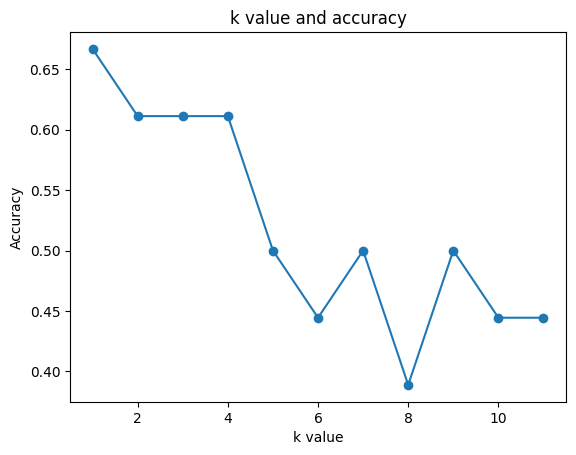

In [62]:
import matplotlib.pyplot as plt
# plot the relationship between k and testing accuracy
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('k value and accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()